In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [2]:
data = pd.read_csv("../../data/processed/data.csv",
                   dtype = {
                            "expensa_id": "object",
                            "unidad_id": "object",
                            "propietario_id": "object",
                            "inquilino_id": "object",
                            "consorcio_id": "object",
                            "expensa_padre_id": "object",
                            "unidad_prop": "object",
                            "consorcio_id": "object",
                            "usuario_creador_id": "object",
                            "concepto_id": "object",
                            "mes": "object",
                            "anio": "object",
                            "unidad_denominacion":"object",
                            "consorcio_nombre": "object",
                            "version":"object",
                            "concepto_id": "object",
                            "unidad_tipo": "object",
                            "modo_pago": "object",
                            "forma_prorrateo": "object",
                            "tipo_prorrateo": "object",
                            "metodo_pago": "object",                       
                    },
                    parse_dates = ["fecha_vencimiento_1", "fecha_vencimiento_2"])
data.fecha_pago = pd.to_datetime(data.fecha_pago, errors="coerce")

In [3]:
data.shape

(264541, 27)

In [10]:
data.dtypes

expensa_id                     object
unidad_id                      object
propietario_id                 object
inquilino_id                   object
fecha_vencimiento_1    datetime64[ns]
fecha_vencimiento_2    datetime64[ns]
monto                         float64
monto_total                   float64
monto_parcial                 float64
expensa_padre_id               object
int_dia                       float64
int_mes                       float64
mes                            object
anio                           object
unidad_denominacion            object
unidad_prop                    object
consorcio_id                   object
consorcio_nombre               object
version                        object
concepto_id                    object
unidad_tipo                    object
modo_pago                      object
forma_prorrateo                object
tipo_prorrateo                 object
fecha_pago                     object
monto_pago                    float64
metodo_pago 

# Generate Posible Target Variables

## Impago

In [4]:
data["impago"] = (data.fecha_pago > data.fecha_vencimiento_1) | data.fecha_pago.isna()
data["impago_1"] = (data.fecha_pago > data.fecha_vencimiento_1) & (data.fecha_pago < data.fecha_vencimiento_2)
data["impago_2"] = (data.fecha_pago > data.fecha_vencimiento_2) | data.fecha_pago.isna()

## How long do they take to pay?

In [5]:
data["fecha_expensa"] = data.anio + '-' + data.mes + '-01'
data.fecha_expensa = pd.to_datetime(data.fecha_expensa)

In [6]:
data = data.loc[data.fecha_expensa < "2019-01-01",:]

In [7]:
data["dias_pago_expensa"] = (data.fecha_pago - data.fecha_expensa).dt.total_seconds() / (24 * 60 * 60)
data["dias_pago_vencimiento_1"] = (data.fecha_pago - data.fecha_vencimiento_1).dt.total_seconds() / (24 * 60 * 60)
data["dias_pago_vencimiento_2"] = (data.fecha_pago - data.fecha_vencimiento_2).dt.total_seconds() / (24 * 60 * 60)

# Analyisis of generated Variables

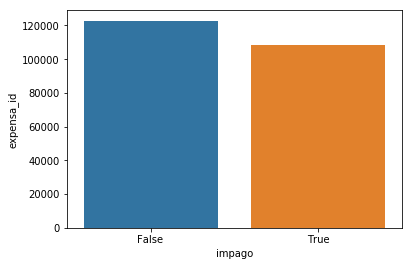

In [59]:
sns.barplot(data = data[["expensa_id","impago"]].groupby("impago").count().reset_index(), x="impago", y="expensa_id")

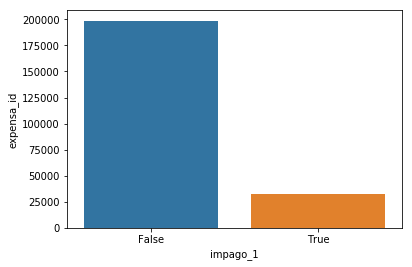

In [60]:
sns.barplot(data = data[["expensa_id","impago_1"]].groupby("impago_1").count().reset_index(), x="impago_1", y="expensa_id")

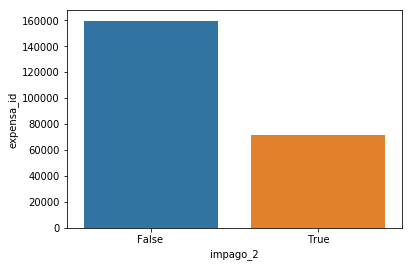

In [61]:
sns.barplot(data = data[["expensa_id","impago_2"]].groupby("impago_2").count().reset_index(), x="impago_2", y="expensa_id")

In [78]:
def stacked_bar_plot(plot_data, bar_colum, prop_column):
    general_prop = plot_data[prop_column].sum()/plot_data.shape[0]
    plot_data = plot_data[["expensa_id",bar_colum, prop_column]].groupby([bar_colum, prop_column]).count().reset_index()
    plot_data = plot_data.pivot(index= bar_colum, columns= prop_column, values='expensa_id')
    plot_data["total"] = plot_data.sum(axis = 1)
    plot_data["False_prop"] = plot_data[False]/plot_data.total
    plot_data["True_prop"] = plot_data[True]/plot_data.total
    rows = list(plot_data.index)
    barWidth = 0.85
    plt.bar(rows, plot_data["True_prop"], color='#ffa100', edgecolor='white', width=barWidth)
    plt.bar(rows, plot_data["False_prop"], bottom=plot_data["True_prop"], color='#0569c6', edgecolor='white', width=barWidth)
    plt.legend([True, False])
    plt.hlines(general_prop, xmin = rows[0], xmax= rows[-1], linestyles="dashed")

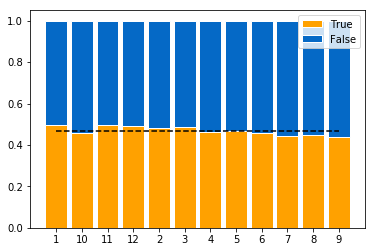

In [98]:
stacked_bar_plot(data, "mes", "impago")

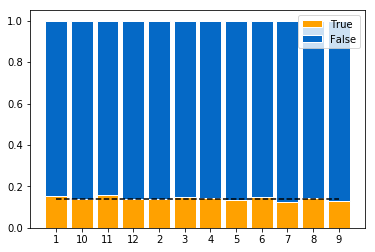

In [99]:
stacked_bar_plot(data, "mes", "impago_1")

El mes de la expensa no es significativo a la hora de detectar los impagos

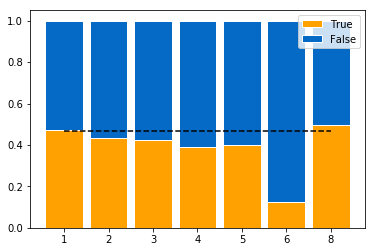

In [100]:
stacked_bar_plot(data, "version", "impago")

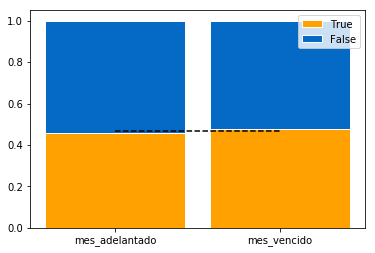

In [102]:
stacked_bar_plot(data, "modo_pago", "impago")

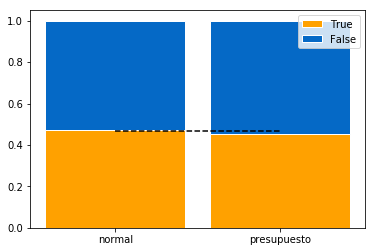

In [103]:
stacked_bar_plot(data, "forma_prorrateo", "impago")

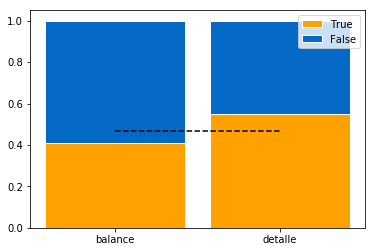

In [104]:
stacked_bar_plot(data, "tipo_prorrateo", "impago")

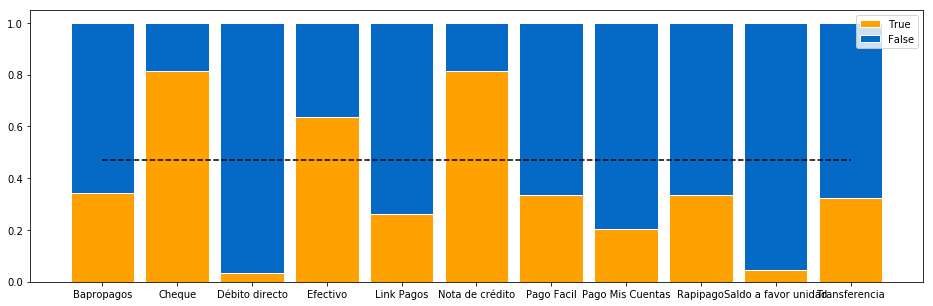

In [106]:
plt.figure(figsize=(16,5))
stacked_bar_plot(data, "metodo_pago", "impago")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


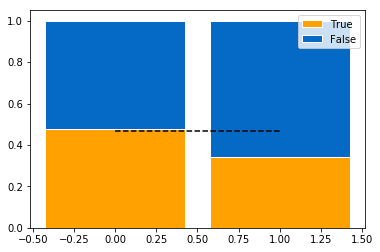

In [107]:
data_aux = data
data_aux["con_inquilino"] = data.inquilino_id != "0"
stacked_bar_plot(data_aux, "con_inquilino", "impago")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


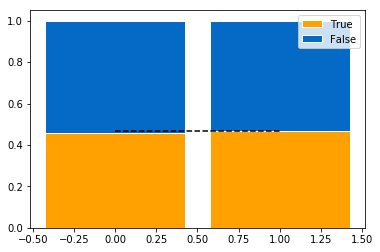

In [108]:
data_aux = data
data_aux["con_propietario"] = data.propietario_id != "0"
stacked_bar_plot(data_aux, "con_propietario", "impago")

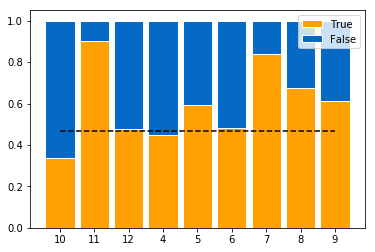

In [111]:
stacked_bar_plot(data, "unidad_tipo", "impago")

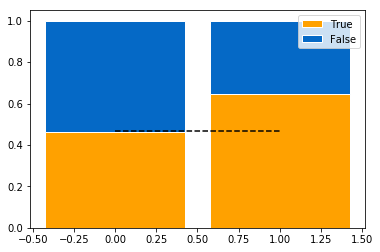

In [27]:
data_aux = data
data_aux["con_monto_parcial"] = data_aux.monto_parcial != 0
stacked_bar_plot(data_aux, "con_monto_parcial", "impago")

Parece que puede ser importante, pero las unidades mas significativas son 4, 6 y 12 y se mantienen practicamente en la linea

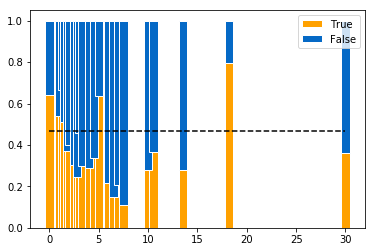

In [113]:
stacked_bar_plot(data, "int_dia", "impago")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


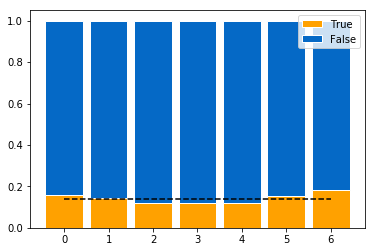

In [114]:
data_aux = data
data_aux["dia_vencimiento_1"] = data_aux.fecha_vencimiento_1.dt.dayofweek
stacked_bar_plot(data_aux, "dia_vencimiento_1", "impago_1")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


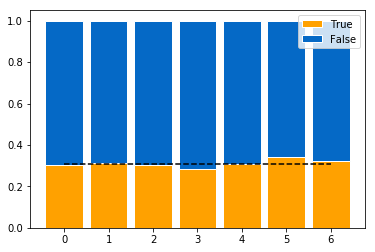

In [116]:
data_aux = data
data_aux["dia_vencimiento_2"] = data_aux.fecha_vencimiento_2.dt.dayofweek
stacked_bar_plot(data_aux, "dia_vencimiento_2", "impago_2")

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


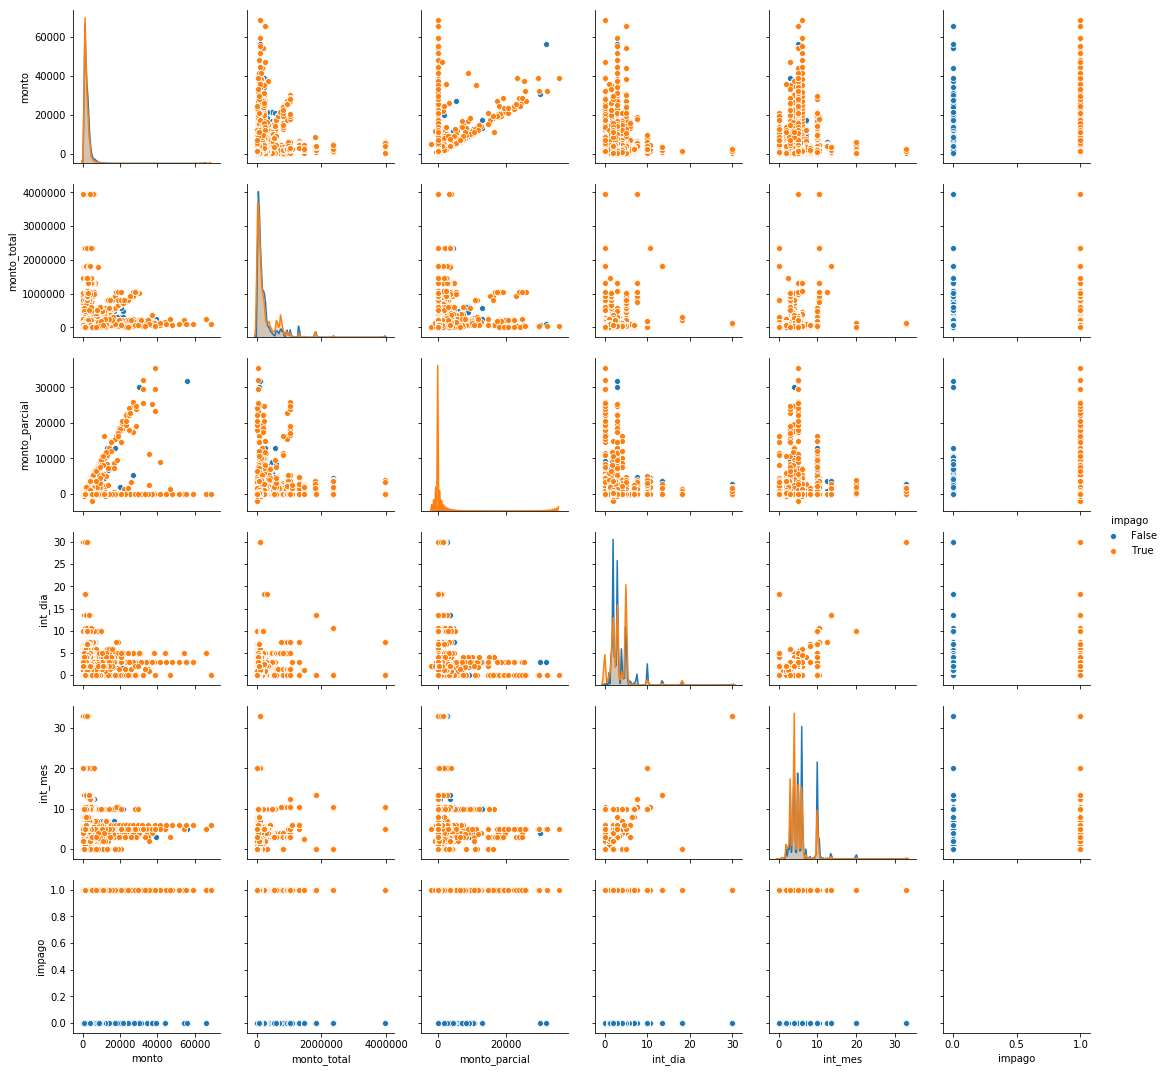

In [10]:
sns.pairplot(data[["monto", "monto_total", "monto_parcial", "int_dia", "int_mes","impago"]], hue="impago")

In [7]:
#data.loc[data.unidad_id=="871",["fecha_expensa","fecha_vencimiento_1", "fecha_vencimiento_2", "fecha_pago", "monto_pago", "metodo_pago","monto", "monto_total", "monto_parcial", "impago"]].sort_values("fecha_vencimiento_1")
data.loc[data.unidad_id=="34",["fecha_expensa","fecha_vencimiento_1", "fecha_vencimiento_2", "fecha_pago", "monto_pago", "metodo_pago","monto", "monto_total", "monto_parcial", "pago_tardio"]].sort_values("fecha_vencimiento_1")

,fecha_expensa,fecha_vencimiento_1,fecha_vencimiento_2,fecha_pago,monto_pago,metodo_pago,monto,monto_total,monto_parcial,pago_tardio
5094,2014-01-01,2014-02-10,2014-02-20,2014-11-05,4132.41,Efectivo,2849.94,42651.39,0.0,True
5095,2014-02-01,2014-03-10,2014-03-20,2014-11-05,4038.16,Efectivo,2884.40,42651.39,0.0,True
5096,2014-03-01,2014-04-10,2014-04-20,2014-04-11,1324.83,Rapipago,1298.85,20380.00,0.0,True
5097,2014-04-01,2014-05-10,2014-05-20,2014-05-14,1819.45,Rapipago,1783.77,28434.91,0.0,True
5098,2014-05-01,2014-06-10,2014-06-20,2014-06-11,1508.04,Rapipago,1478.47,23677.85,0.0,True
5099,2014-06-01,2014-07-10,2014-07-20,2014-07-08,2307.25,Rapipago,2307.25,36481.83,0.0,False
5100,2014-07-01,2014-08-10,2014-08-20,2014-08-07,1760.85,Rapipago,1760.85,28168.49,0.0,False
5101,2014-08-01,2014-09-10,2014-09-20,2014-09-03,1828.58,Rapipago,1828.58,29016.07,0.0,False
5102,2014-09-01,2014-10-10,2014-10-20,2014-10-07,1259.43,Rapipago,1259.43,19594.44,0.0,False
5103,2014-10-01,2014-11-10,2014-11-20,2014-11-20,2204.76,Rapipago,2086.42,31655.88,0.0,True


In [34]:
data.groupby(["unidad_id","consorcio_id"]).count().sort_values("expensa_id",ascending=False).head(100)

,,expensa_id,propietario_id,inquilino_id,fecha_vencimiento_1,fecha_vencimiento_2,monto,monto_total,monto_parcial,expensa_padre_id,int_dia,...,monto_pago,metodo_pago,impago,impago_1,impago_2,fecha_expensa,dias_pago_expensa,dias_pago_vencimiento_1,dias_pago_vencimiento_2,con_monto_parcial
unidad_id,consorcio_id,,,,,,,,,,,,,,,,,,,,,
10,8,60,60,60,60,60,60,60,60,60,60,...,58,58,60,60,60,60,58,58,58,60
31,8,60,60,60,60,60,60,60,60,60,60,...,58,58,60,60,60,60,58,58,58,60
33,8,60,60,60,60,60,60,60,60,60,60,...,58,58,60,60,60,60,58,58,58,60
34,8,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
35,8,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
36,8,60,60,60,60,60,60,60,60,60,60,...,52,52,60,60,60,60,52,52,52,60
37,8,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
38,8,60,60,60,60,60,60,60,60,60,60,...,52,52,60,60,60,60,52,52,52,60
39,8,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60


In [3]:
data["impago"] = data.fecha_pago.isna()
data["pago_tardio_1"] = (data.fecha_pago > data.fecha_vencimiento_1) & (data.fecha_pago <= data.fecha_vencimiento_2)
data["pago_tardio_2"] = (data.fecha_pago > data.fecha_vencimiento_2)
data["pago_tardio"] = data.pago_tardio_1 | data.pago_tardio_2

In [63]:
data.impago_1.sum()/data.impago.sum()

0.3393923751935698

In [64]:
data.impago_2.sum()/data.impago.sum()

0.45109136494358826

In [65]:
(data.impago_1.sum() + data.impago_2.sum())/data.impago.sum()

0.790483740137158

In [67]:
data.impago_3.sum()/data.impago.sum()

0.20951625986284197

In [74]:
data_aux = data.loc[~data.impago,:]

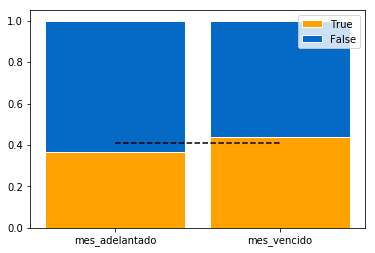

In [80]:
stacked_bar_plot(data_aux, "modo_pago", "pago_tardio")

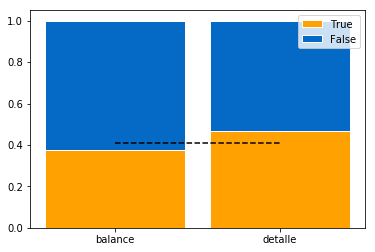

In [79]:
stacked_bar_plot(data_aux, "tipo_prorrateo", "pago_tardio")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


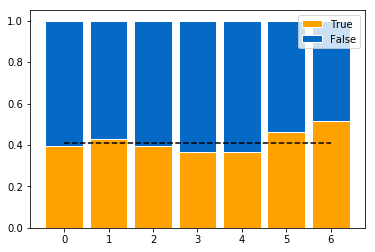

In [86]:
data_aux_2 = data_aux
data_aux_2["dia_fecha_vencimiento"] = data_aux_2.fecha_vencimiento_1.dt.dayofweek
stacked_bar_plot(data_aux_2, "dia_fecha_vencimiento", "pago_tardio")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


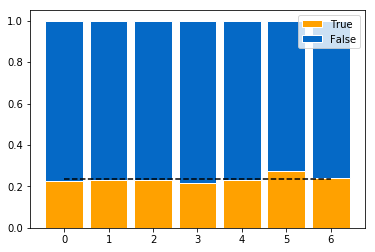

In [89]:
data_aux_2 = data_aux
data_aux_2["dia_fecha_vencimiento_2"] = data_aux_2.fecha_vencimiento_2.dt.dayofweek
stacked_bar_plot(data_aux_2, "dia_fecha_vencimiento_2", "pago_tardio_2")

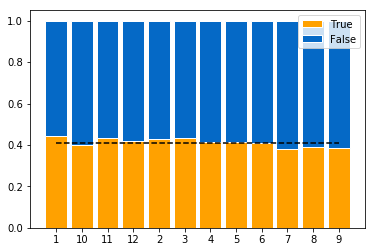

In [90]:
stacked_bar_plot(data_aux, "mes", "pago_tardio")

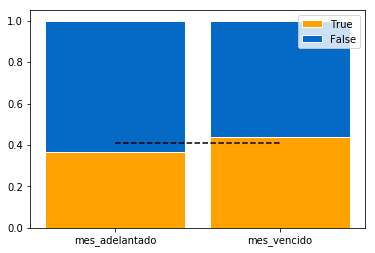

In [97]:
stacked_bar_plot(data_aux, "modo_pago", "pago_tardio")

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.loc[:,["monto_total","modo_pago", "mes", "int_dia", "int_mes", "tipo_prorrateo", "metodo_pago", "forma_prorrateo", "unidad_tipo"]]
X = pd.get_dummies(X) 

X_train = X.loc[1:20000,:]
Y_train = data.loc[1:20000,"pago_tardio"]

X_test = X.loc[200001:,:]
Y_test = data.loc[200001:,"pago_tardio"]

clf = RandomForestClassifier()

clf.fit(X_train, Y_train)


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [111]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

print("train")
print("accuracy_score:",accuracy_score(Y_train,clf.predict(X_train)))
print("f1_score:",f1_score(Y_train,clf.predict(X_train)))
print("recall_score:",recall_score(Y_train,clf.predict(X_train)))
print("precision_score:",precision_score(Y_train,clf.predict(X_train)))

print("test")
print("accuracy_score:",accuracy_score(Y_test,clf.predict(X_test)))
print("f1_score:",f1_score(Y_test,clf.predict(X_test)))
print("recall_score:",recall_score(Y_test,clf.predict(X_test)))
print("precision_score:",precision_score(Y_test,clf.predict(X_test)))

train
accuracy_score: 0.8148417606402328
f1_score: 0.5882352941176471
recall_score: 0.46973052787006275
precision_score: 0.7867078825347759
test
accuracy_score: 0.5745242667597765
f1_score: 0.4777822418642025
recall_score: 0.5471107839528893
precision_score: 0.4240479246897732


In [101]:
pd.get_dummies(X_train)

,monto_total,int_dia,int_mes,modo_pago_mes_adelantado,modo_pago_mes_vencido,mes_1,mes_10,mes_11,mes_12,mes_2,...,mes_5,mes_6,mes_7,mes_8,mes_9,tipo_prorrateo_balance,tipo_prorrateo_detalle,unidad_tipo_4,unidad_tipo_5,unidad_tipo_6
1,122499.07,5.0,10.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,80511.69,5.0,10.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,148806.68,5.0,10.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,127312.34,5.0,10.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
5,112226.71,5.0,10.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,94292.58,5.0,10.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
7,108096.11,5.0,10.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8,97701.72,5.0,10.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9,123724.35,5.0,10.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
10,133655.54,5.0,10.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


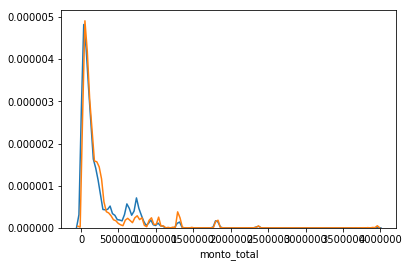

In [96]:
sns.distplot(data_aux.loc[data_aux.pago_tardio,"mod"], hist=False)
sns.distplot(data_aux.loc[~data_aux.pago_tardio,"monto_total"], hist=False)

In [10]:
data["fecha_expensa"] = data.anio + '-' + data.mes + '-01'
data.fecha_expensa = pd.to_datetime(data.fecha_expensa)

In [11]:
data["dias_para_pagar"] = (data.fecha_pago - data.fecha_expensa).dt.total_seconds() / (24 * 60 * 60)

In [51]:
data_unidad_34 = data.loc[data.unidad_id  == "34", ["fecha_expensa", "dias_para_pagar"]]
data_unidad_34 = data_unidad_34.iloc[2:-1,:]

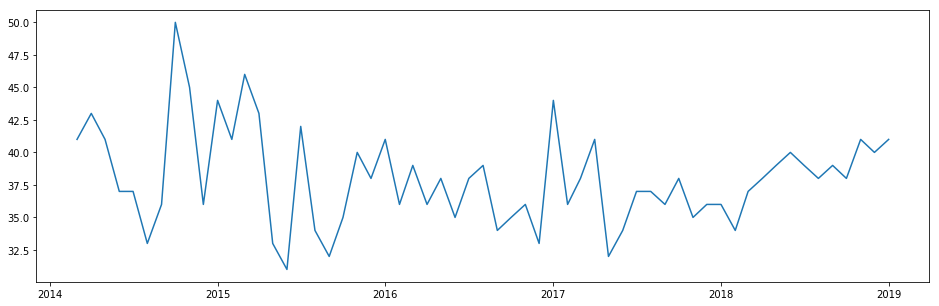

In [52]:
plt.figure(figsize=(16,5))
plt.plot(data_unidad_34.fecha_expensa, data_unidad_34.dias_para_pagar)

In [53]:
data_unidad_34 = data_unidad_34.set_index("fecha_expensa")

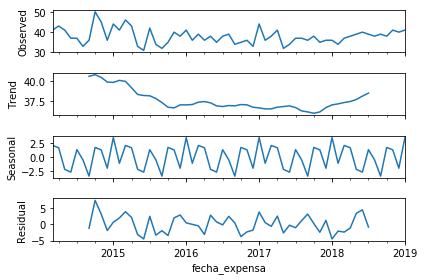

In [54]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(data_unidad_34, model='additive')
fig = decomposition.plot()
plt.show()

In [50]:
data_unidad_34

,dias_para_pagar
fecha_expensa,
2014-03-01,41.0
2014-04-01,43.0
2014-05-01,41.0
2014-06-01,37.0
2014-07-01,37.0
2014-08-01,33.0
2014-09-01,36.0
2014-10-01,50.0
2014-11-01,45.0
